Importa do arquivo PrevSelic010216_300325 (https://www3.bcb.gov.br/expectativas2/#/consultaSeriesEstatisticas) e mensualiza a media da taxa selic pra ultimo registro e insere no BD
SqCenarios

In [20]:
import pandas as pd
!pip install xlrd 



Defaulting to user installation because normal site-packages is not writeable


In [22]:
# Lê o arquivo Excel, sem especificar o header por enquanto
arquivo = pd.ExcelFile("PrevSelic010216_300325.xls")

# Lê somente a primeira linha
primeira_linha = arquivo.parse(sheet_name=0, header=None).iloc[0]
display(primeira_linha)
# Transforma os dados em uma lista para melhor visualização
primeira_linha_list =(primeira_linha.to_list())  
display(primeira_linha_list)




0     Selic - % a.a - Média - Período de 01/02/2016 ...
1                                                   NaN
2                                                   NaN
3                                                   NaN
4                                                   NaN
                            ...                        
85                                                  NaN
86                                                  NaN
87                                                  NaN
88                                                  NaN
89                                                  NaN
Name: 0, Length: 90, dtype: object

['Selic - % a.a - Média - Período de 01/02/2016 a 27/03/2025 - Base: Expectativas informadas nos últimos 30 dias',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [24]:
df = pd.read_excel("PrevSelic010216_300325.xls", header=1)
display(df.head())
display(df.dtypes)

,Data,2R/2016,3R/2016,4R/2016,5R/2016,6R/2016,7R/2016,8R/2016,1R/2017,2R/2017,...,1R/2026,2R/2026,3R/2026,4R/2026,5R/2026,6R/2026,7R/2026,8R/2026,1R/2027,2R/2027
0,2016-02-01,14.56,14.66,14.68,14.62,14.57,14.45,14.37,14.09,13.93,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-02-02,14.52,14.60,14.62,14.55,14.49,14.37,14.29,14.04,13.89,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-02-03,14.45,14.51,14.52,14.47,14.42,14.30,14.22,13.97,13.81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-02-04,14.42,14.47,14.46,14.43,14.37,14.25,14.14,13.89,13.72,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-02-05,14.39,14.43,14.43,14.40,14.34,14.23,14.12,13.86,13.69,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Data       datetime64[ns]
2R/2016           float64
3R/2016           float64
4R/2016           float64
5R/2016           float64
                ...      
6R/2026           float64
7R/2026           float64
8R/2026           float64
1R/2027           float64
2R/2027           float64
Length: 90, dtype: object

In [26]:
ultimas = df.iloc[-5:, -25:]
display (ultimas)


,2R/2024,3R/2024,4R/2024,5R/2024,6R/2024,7R/2024,8R/2024,1R/2025,2R/2025,3R/2025,...,1R/2026,2R/2026,3R/2026,4R/2026,5R/2026,6R/2026,7R/2026,8R/2026,1R/2027,2R/2027
2288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.2500,14.7968,...,14.6983,14.3311,13.9423,13.5745,13.2496,12.9793,12.7869,12.6187,12.5023,NaN
2289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.2464,14.7964,...,14.6987,14.3267,13.9333,13.5624,13.2363,12.9661,12.7752,12.6085,12.4836,NaN
2290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.2464,14.7964,...,14.6987,14.3267,13.9333,13.5624,13.2363,12.9661,12.7752,12.6085,12.4812,NaN
2291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.7950,...,14.6773,14.3082,13.9232,13.5610,13.2400,12.9755,12.7831,12.6205,12.4763,12.1000
2292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.7870,...,14.6510,14.2810,13.8924,13.5241,13.1966,12.9342,12.7390,12.5673,12.4226,12.3278


Modifica os nomes de colunas com a data do fines de mes

In [29]:
numcol = len(df.columns)
print (numcol)
print (df.columns[1])
def substituir_nome(coluna):
    # Obtém o ano após a barra
    if coluna[0] =='7' :
        ano = coluna.split('/')[-1]
        newcol = f"30/11/{ano}"
        return newcol  # Nova data com o ano
    elif coluna[0] =='8':
        ano = coluna.split('/')[-1]
        newcol = f"31/12/{ano}"
        return newcol
    elif coluna[0] =='1':
        ano = coluna.split('/')[-1]
        newcol = f"31/01/{ano}"
        return newcol
    elif coluna[0] =='2':
        ano = coluna.split('/')[-1]
        newcol = f"31/03/{ano}"        
        return newcol
    elif coluna[0] =='3':
        ano = coluna.split('/')[-1]
        newcol = f"31/05/{ano}"
        return newcol
    elif coluna[0] =='4':
        ano = coluna.split('/')[-1]
        newcol = f"30/06/{ano}"
        return newcol
    elif coluna[0] =='5':
        ano = coluna.split('/')[-1]
        newcol = f"31/07/{ano}"
        return newcol
    elif coluna[0] =='6':
        ano = coluna.split('/')[-1]
        newcol = f"30/09/{ano}"
        return newcol
    else:
        return coluna  # Caso não siga o padrão, mantém o nome original

# Renomeando as colunas do DataFrame
df.rename(columns=substituir_nome, inplace=True)

display (df)



  

90
2R/2016


,Data,31/03/2016,31/05/2016,30/06/2016,31/07/2016,30/09/2016,30/11/2016,31/12/2016,31/01/2017,31/03/2017,...,31/01/2026,31/03/2026,31/05/2026,30/06/2026,31/07/2026,30/09/2026,30/11/2026,31/12/2026,31/01/2027,31/03/2027
0,2016-02-01,14.56,14.66,14.68,14.62,14.57,14.45,14.37,14.09,13.93,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-02-02,14.52,14.60,14.62,14.55,14.49,14.37,14.29,14.04,13.89,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-02-03,14.45,14.51,14.52,14.47,14.42,14.30,14.22,13.97,13.81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-02-04,14.42,14.47,14.46,14.43,14.37,14.25,14.14,13.89,13.72,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-02-05,14.39,14.43,14.43,14.40,14.34,14.23,14.12,13.86,13.69,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,2025-03-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.6983,14.3311,13.9423,13.5745,13.2496,12.9793,12.7869,12.6187,12.5023,NaN
2289,2025-03-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.6987,14.3267,13.9333,13.5624,13.2363,12.9661,12.7752,12.6085,12.4836,NaN
2290,2025-03-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.6987,14.3267,13.9333,13.5624,13.2363,12.9661,12.7752,12.6085,12.4812,NaN
2291,2025-03-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.6773,14.3082,13.9232,13.5610,13.2400,12.9755,12.7831,12.6205,12.4763,12.1000


agrega colunas com os meses faltantes com os valores do mes anterior pra completar as datas 

In [32]:
import pandas as pd
import numpy as np



# Trabalhar apenas com as colunas que representam datas
colunas_datas = df.columns[1:]  # Ignorar a primeira coluna 'Data'
colunas_existentes = pd.to_datetime(colunas_datas, format='%d/%m/%Y')

# Criar intervalo completo de finais de mês no intervalo do DataFrame
intervalo_completo = pd.date_range(start=colunas_existentes.min(), end=colunas_existentes.max(), freq='ME')

# Identificar colunas faltantes
colunas_faltantes = [data for data in intervalo_completo if data not in colunas_existentes]

# Adicionar as colunas faltantes com valores NaN
for nova_coluna in colunas_faltantes:
    df[nova_coluna.strftime('%d/%m/%Y')] = np.nan

# Ordenar as colunas cronologicamente, mantendo 'Data' como a primeira coluna
colunas_ordenadas = ['Data'] + sorted(df.columns[1:], key=lambda x: pd.to_datetime(x, format='%d/%m/%Y'))
df = df[colunas_ordenadas]

# Preencher os valores ausentes (meses faltantes) com os valores do mês anterior
df.iloc[:, 1:] = df.iloc[:, 1:].ffill(axis=1)

# Exibir o DataFrame final
display(df.tail())

,Data,31/03/2016,30/04/2016,31/05/2016,30/06/2016,31/07/2016,31/08/2016,30/09/2016,31/10/2016,30/11/2016,...,30/06/2026,31/07/2026,31/08/2026,30/09/2026,31/10/2026,30/11/2026,31/12/2026,31/01/2027,28/02/2027,31/03/2027
2288,2025-03-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.5745,13.2496,13.2496,12.9793,12.9793,12.7869,12.6187,12.5023,12.5023,12.5023
2289,2025-03-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.5624,13.2363,13.2363,12.9661,12.9661,12.7752,12.6085,12.4836,12.4836,12.4836
2290,2025-03-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.5624,13.2363,13.2363,12.9661,12.9661,12.7752,12.6085,12.4812,12.4812,12.4812
2291,2025-03-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.5610,13.2400,13.2400,12.9755,12.9755,12.7831,12.6205,12.4763,12.4763,12.1000
2292,2025-03-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.5241,13.1966,13.1966,12.9342,12.9342,12.7390,12.5673,12.4226,12.4226,12.3278


In [34]:
display(df.dtypes)


Data          datetime64[ns]
31/03/2016           float64
30/04/2016           float64
31/05/2016           float64
30/06/2016           float64
                   ...      
30/11/2026           float64
31/12/2026           float64
31/01/2027           float64
28/02/2027           float64
31/03/2027           float64
Length: 134, dtype: object

Converte a fila com os nomes de colunas em uma coluna DataPredic do df_novo

In [37]:
import pandas as pd

# Obter o valor da última fila da coluna "Data"
data_focus_value = df.iloc[-1, 0]
data_focus_value = pd.to_datetime(data_focus_value, format='%Y-%m-%d').strftime('%d/%m/%Y')


# Criar a lista de valores para as colunas "DataPredic" e "Mediana"
data_predic_values = df.columns[1:]  # Excluir a primeira coluna



media_values = df.iloc[-1, 1:]    # Valores da última fila (excluindo a primeira coluna)

# Criar o novo DataFrame
df_novo = pd.DataFrame({
    'DataFocus': [data_focus_value] * len(data_predic_values),  # Repetir o valor de "DataFocus"
    'DataPredic': data_predic_values,                          # Nomes das colunas
    'Media': media_values.values                           # Valores da última fila
})

# Exibir o novo DataFrame
print(df_novo)

      DataFocus  DataPredic    Media
0    21/03/2025  31/03/2016      NaN
1    21/03/2025  30/04/2016      NaN
2    21/03/2025  31/05/2016      NaN
3    21/03/2025  30/06/2016      NaN
4    21/03/2025  31/07/2016      NaN
..          ...         ...      ...
128  21/03/2025  30/11/2026   12.739
129  21/03/2025  31/12/2026  12.5673
130  21/03/2025  31/01/2027  12.4226
131  21/03/2025  28/02/2027  12.4226
132  21/03/2025  31/03/2027  12.3278

[133 rows x 3 columns]


In [39]:
# Converter a coluna "DataFocus" para datetime no formato correto
df_novo['DataFocus'] = pd.to_datetime(df_novo['DataFocus'], format='%d/%m/%Y')

# Converter a coluna "DataPredic" para datetime no formato correto
df_novo['DataPredic'] = pd.to_datetime(df_novo['DataPredic'], format='%d/%m/%Y')
df_novo['Media'] = df_novo['Media'].astype(float)

display (df_novo.dtypes)
display (df_novo.tail(5))


         

DataFocus     datetime64[ns]
DataPredic    datetime64[ns]
Media                float64
dtype: object

,DataFocus,DataPredic,Media
128,2025-03-21,2026-11-30,12.7390
129,2025-03-21,2026-12-31,12.5673
130,2025-03-21,2027-01-31,12.4226
131,2025-03-21,2027-02-28,12.4226
132,2025-03-21,2027-03-31,12.3278


In [41]:
df_novo = df_novo.dropna(subset=['Media'])
display (df_novo.head(5))

,DataFocus,DataPredic,Media
110,2025-03-21,2025-05-31,14.7870
111,2025-03-21,2025-06-30,15.0405
112,2025-03-21,2025-07-31,15.0557
113,2025-03-21,2025-08-31,15.0557
114,2025-03-21,2025-09-30,15.0528


In [43]:
# Criar a nova coluna "id_SelicPrev" como a união de "DataFocus" e "DataPredic"
df_novo['id_SelicPrev'] = df_novo['DataFocus'].astype(str) + "_" + df_novo['DataPredic'].astype(str)
df_novo = df_novo[['id_SelicPrev'] + [col for col in df_novo.columns if col != 'id_SelicPrev']]

# Exibir o DataFrame atualizado
display(df_novo.head(5))

,id_SelicPrev,DataFocus,DataPredic,Media
110,2025-03-21_2025-05-31,2025-03-21,2025-05-31,14.7870
111,2025-03-21_2025-06-30,2025-03-21,2025-06-30,15.0405
112,2025-03-21_2025-07-31,2025-03-21,2025-07-31,15.0557
113,2025-03-21_2025-08-31,2025-03-21,2025-08-31,15.0557
114,2025-03-21_2025-09-30,2025-03-21,2025-09-30,15.0528


In [45]:
import pandas as pd
import sqlite3


# Conectar ao banco SQLite (criando um arquivo ou memória)
conexao = sqlite3.connect('SqCenarios.db')  # Cria o arquivo meu_banco.sqlite

# Salvar o DataFrame como uma tabela no banco
df_novo.to_sql('tbselicfocus', conexao, if_exists='replace', index=False)

# Fechar a conexão
conexao.close()

In [47]:

# Conectar ao banco de dados SQLite
conexao = sqlite3.connect('SqCenarios.db')  # Insira o nome do arquivo do banco de dados aqui

# Ler a tabela do banco de dados para um DataFrame
nome_tabela = 'tbselicfocus'  # Substitua pelo nome da tabela
dfselicprev = pd.read_sql(f"SELECT * FROM {nome_tabela}", conexao)

# Fechar a conexão
conexao.close()

# Exibir o DataFrame
display(dfselicprev.head(5))

,id_SelicPrev,DataFocus,DataPredic,Media
0,2025-03-21_2025-05-31,2025-03-21 00:00:00,2025-05-31 00:00:00,14.7870
1,2025-03-21_2025-06-30,2025-03-21 00:00:00,2025-06-30 00:00:00,15.0405
2,2025-03-21_2025-07-31,2025-03-21 00:00:00,2025-07-31 00:00:00,15.0557
3,2025-03-21_2025-08-31,2025-03-21 00:00:00,2025-08-31 00:00:00,15.0557
4,2025-03-21_2025-09-30,2025-03-21 00:00:00,2025-09-30 00:00:00,15.0528


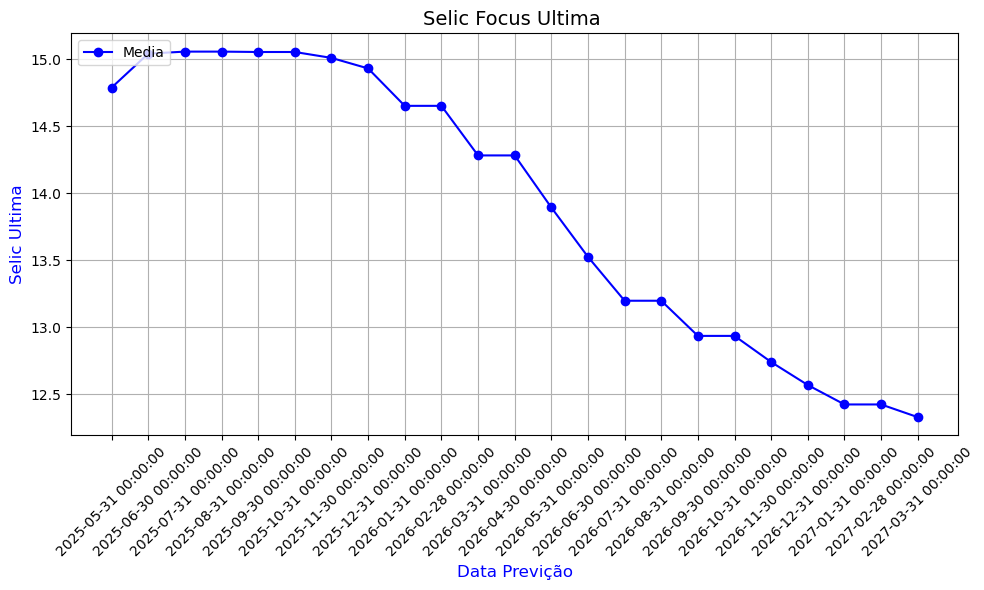

In [49]:
import matplotlib.pyplot as plt

# Criar o gráfico principal para "Van"
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotar "Van" no eixo Y principal
ax1.plot(dfselicprev['DataPredic'], dfselicprev['Media'], marker='o', linestyle='-', color='b', label='Media')
ax1.set_xlabel('Data Previção', fontsize=12, color='b')
ax1.set_ylabel('Selic Ultima', fontsize=12, color='b')
#ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)
# Inclinar os rótulos do eixo x em 45 graus
plt.xticks(rotation=45)
# Adicionar um título ao gráfico
plt.title('Selic Focus Ultima ', fontsize=14)

# Adicionar legendas para cada série
ax1.legend(loc='upper left')

# Exibir o gráfico
plt.tight_layout()  # Garante que os rótulos não sejam cortados
plt.show()